# Statistical Distributions

![](images/distributions.png)

# Order of Business:
    
>    1. Describe the difference between discrete vs continuous variables
>    2. Describe the difference between PMFs, PDFs, CDFs
>    3. Introduce the bernouli and binomial distributions
>    4. Introduce the normal distribution and empirical rule

## What is a statistical distribution?

> After establishing the set of all possible outcomes, a statistical distribution is a representation of the relative frequency each event will occur.

The distributions we introduce today will reappear throughout the bootcamp.  They will:

1. Allow us to conduct statistical tests to judge the validity of our conclusions.  As a data scientist at your company, you may be asked to perform various scientific tests. For example, you may be asked to judge whether a certain change to the user interface of your website increases conversion rate. 
2. Provide the foundation for specific assumptions of linear regression.
3. Appear in the cost functions tied to logistic regression and other models.
4. Drive the classification decisions made in parametric models, such as Naive-Bayes. 



# 1. Discrete vs Continuous

We will learn about a variety of different probability distributions, but before we do so, we need to establish the difference between **discrete** and **continuous** variables.

## Discrete
>  With discrete distributions, the values can only take a finite set of values.  Take, for example, a roll of a single six-sided die. 

![](images/uniform.png)

> - There are 6 possible outcomes of the roll.  In other words, 4.5 cannot be an outcome. As you see on the PMF plot, the bars which represent probability do not touch, suggesting non-integer numbers between 1 and 6 are not possible results.

### Let's think back to our Phase 1 projects: What are some examples of discrete probability distributions in either the King County or Movie datasets?

your answer here

In [1]:
# probability of a youth in SKC being an opportunity youth vs not
# Probability of an opporunity youth in SKC having a certain level of education.
# Probability distribution of of movies that have more than 500 reviews across genres
# Probability distribution of movies making over 25 million across studios.

Let's take a moment to look back at the Divy data we encountered in our visualizations lesson.



Text(0.5, 1.0, 'Distribution of Divy Rides per Day')

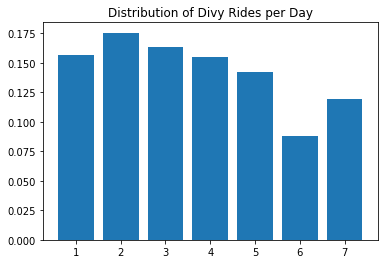

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

values, counts = np.unique(divy_trips['weekday'], return_counts = True)
counts = [count/sum(counts) for count in counts]
ax.bar(values, counts)
ax.set_title('Distribution of Divy Rides per Day')

The above plot visualizes an **empirical** distribution. Empirical distributions are based on observations of real world phenomena. 

An a**nalytical** distribution is one which is created by a mathematical function.  We use analytical functions to model real world phenomena. 
[ThinkStats2e](http://greenteapress.com/thinkstats2/html/thinkstats2006.html)

#### Examples of analytical discrete distributions:

> 1. The Uniform Distribution:- occurs when all possible outcomes are equally likely.
> 2. The Bernoulli Distribution: - represents the probability of success for a certain experiment (binary outcome).
> 3. The Binomial Distribution - represents the probability of observing a specific number of successes (Bernoulli trials) in a specific number of trials.
> 4. The Poisson Distribution:- represents the probability of 𝑛 events in a given time period when the overall rate of occurrence is constant.



## Continuous

With a continous distribution, the set of possible results is an infinite set of values within a range. One way to think about continuous variables are variables that have been measured.  Measurement can always be more precise.

> - A common example is height.  Although we think of height often in values such as 5 feet 7 inches, the exact height of a person can be any value within the range of possible heights.  In other words, a person could be 5 foot 7.000001 inches tall. 
> - Another example is temperature, as shown below:

![](images/pdf.png)

#### Examples of analytical continuous distributions
> 1. Continuous uniform
> 2. The Normal or Gaussian distribution.
> 3. Exponential


### What are examples of continuous probability distributions in the SKC and movie datasets?

    # your answer here

In [7]:
# Probability that an opportunity youth is of a certain age in SKC
# Probability distribution of the average review of a movie


Text(0.5, 1.0, 'Divy Bike Ride Time in Seconds\n (No Outliers)')

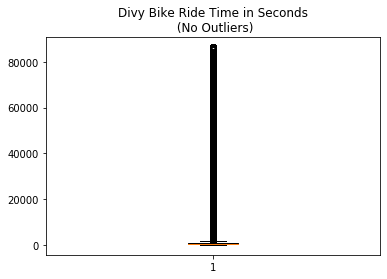

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.boxplot(divy_trips.ride_time);
ax.set_title("Divy Bike Ride Time in Seconds\n (No Outliers)")

Text(0.5, 1.0, 'Divy Bike Ride Time in Seconds\n (No Outliers)')

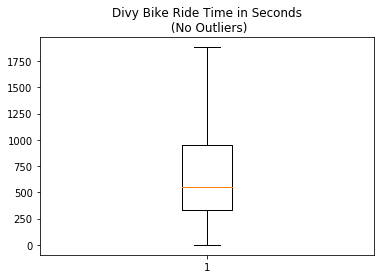

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.boxplot(divy_trips.ride_time, showfliers=False);
ax.set_title("Divy Bike Ride Time in Seconds\n (No Outliers)")

Text(0.5, 1.0, 'Divy Bike Ride Time in Seconds\n (No Outliers)')

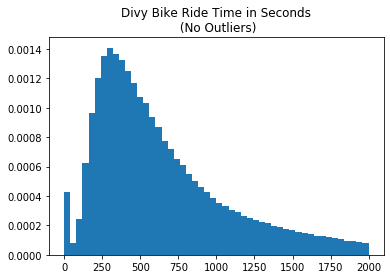

In [14]:
fig, ax = plt.subplots()

no_fliers_rt = divy_trips[divy_trips.ride_time < 2000]

ax.hist(no_fliers_rt.ride_time, bins=50, density=True);
ax.set_title("Divy Bike Ride Time in Seconds\n (No Outliers)")

The distinction between descrete and continuous is very important to have in your mind, and can easily be seen in plots. 

Let's do a quick exercise. There are two tasks.  

1. First, simply change the color of the plots representing descrete data to orange and the plots represent continous data to blue.
2. Attach the titles to the distributions you think reflect the data set described.

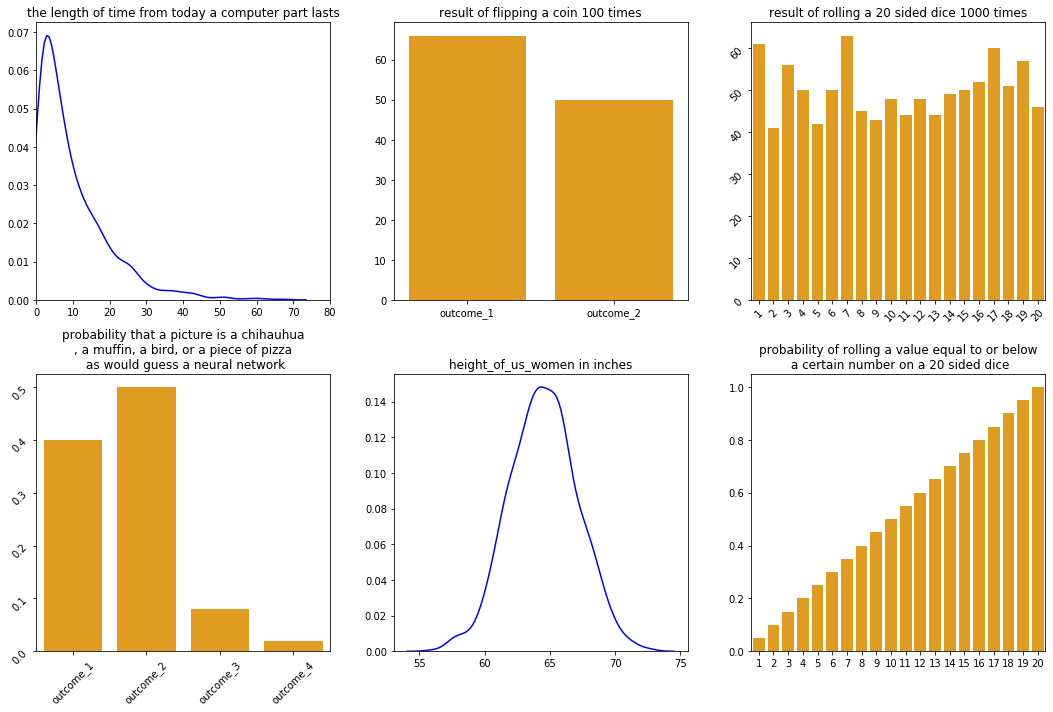

In [7]:
title_1 = "height_of_us_women in inches"
title_2 = 'result of flipping a coin 100 times'
title_3 = 'result of rolling a 20 sided dice 1000 times'
title_4 = 'the length of time from today a computer part lasts'
title_5 = 'probability that a picture is a chihauhua\n, a muffin, a bird, or a piece of pizza\n as would guess a neural network'
title_6 = 'probability of rolling a value equal to or below\n a certain number on a 20 sided dice'
no_title = 'no_title'

fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.kdeplot(np.random.exponential(10, size=1000), ax=ax[0][0], color='blue')
ax[0][0].set_xlim(0,80)
ax[0][0].set_title(title_4)

sns.barplot(['outcome_1', 'outcome_2', 'outcome_3', 'outcome_4'], [.4,.5,.08,.02], ax=ax[1][0], color='orange')
ax[1][0].tick_params(labelrotation=45)
ax[1][0].set_title(title_5)

sns.kdeplot(np.random.normal(64.5, 2.5, 1000), ax=ax[1][1], color='blue')
ax[1][1].set_title(title_1)

sns.barplot(x=['outcome_1','outcome_2'], y=[sum(np.random.binomial(1,.5, 100)),100 - sum(np.random.binomial(1,.5, 100))], ax=ax[0][1], color='orange')
ax[0][1].set_title(title_2)

sns.barplot(x=list(range(1,21)), y=np.unique(np.random.randint(1,21,1000), return_counts=True)[1], ax=ax[0][2], color='orange')
ax[0][2].tick_params(labelrotation=45)
ax[0][2].set_title(title_3)

sns.barplot(list(range(1,21)), np.cumsum([1/20 for number in range(1,21)]), ax=ax[1][2], color='orange')
ax[1][2].set_title(title_6)

plt.tight_layout()


# 2. PMFs, PDFs, and CDFs, oh my!

## PMF: Probability Mass Function


The $\bf{probability\ mass\ function\ (pmf)}$ for a random variable gives, at any value $k$, the probability that the random variable takes the value $k$. Suppose, for example, that I have a jar full of lottery balls containing:
- 50 "1"s,
- 25 "2"s,
- 15 "3"s,
- 10 "4"s

We then represent this function in a plot like so:

In [10]:
probs = [count/sum(counts) for count in counts]

lotto_dict = {number: prob for number,prob in zip(numbers, probs)}
lotto_dict

{1: 0.5, 2: 0.25, 3: 0.15, 4: 0.1}

### Expected Value/Mean

The expected value, or the mean, describes the 'center' of the distribution (you may hear this called the first moment).  The 'center' refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

For a discrete distribution, working from the vantage point of a collected sample of n data points:

mean = $\Large\mu = \frac{\Sigma^n_{i = 1}x_i}{n}$

If we are working from the vantage point of known probabilities, the mean is referred to as the expected value. The expected value of a discrete distribution is the weighted sum of all values of x, where the weight is their probability.
 
The expected value of the Lotto example is:
${\displaystyle \operatorname {E} [X]= \Sigma^n_{i=1}p(x_i)x_i}$


## Let's calculate the expected value of the lotto example:


In [13]:

expected_value = np.sum(np.array(list(lotto_dict.keys())) 
                        * np.array(list(lotto_dict.values())))
expected_value

1.85

### Variance/Standard Deviation
Variance describes the spread of the data (it is also referred to as the second moment).  The 'spread' refers loosely to how far away the values are from the center.

Standard deviation is the square root of variance, and effectively measures the *average distance away from the mean*.

From the standpoint of a sample, the variance of a discrete distribution of n data points is:

std = $\Large\sigma = \sqrt{\frac{\Sigma^n_{i = 1}(x_i - \mu)^2}{n}}$


Variance is the expectation of the squared deviation of a random variable from its mean.

For our Lotto PMF, that means:

 $ \Large E((X-\mu)^2) = \sigma^2 = \Sigma^n_{i=1}p(x_i)(x_i - \mu)^2$


## Let's calculate the variance for the Lotto Ball example


In [15]:
expected_value = np.sum(np.array(list(lotto_dict.keys())) 
                        * np.array(list(lotto_dict.values())))
variance = np.sum(np.array(list(lotto_dict.values())) 
                  * (np.array(list(lotto_dict.keys()) - np.full(4,expected_value))**2
                                 ))
variance

1.0275

# Pair Program 7 minutes

The **uniform** distribution describes a set of discrete outcomes whose probabilities are all equally likely.

A common example is the roll of a die.  

![dice](https://media.giphy.com/media/3ohhwLh5dw0i7iLzOg/giphy.gif)



For the following pair programming challenge, you are tasked with:

    1. Calculating the expected value of a 12-sided die roll using the above equations.
    2. Calculating the variance and standard deviation of the 12-sided die roll using the above equations.
    3. Plot the pmf of the 12-sided die roll.

In [19]:
expected_value = sum([1/12 * value for value in range(1,13)])
expected_value

6.5

In [21]:
variance = sum([1/12 * (value-expected_value)**2 for value in range(1,13) ])
standard_deviation = np.sqrt(variance)
standard_deviation

3.452052529534663

To check your answers, use the formulae below.


$\Large E(X)=\frac{a+b}{2}$

Where a is the lowest value and b is the highest. 



Variance can be calculated as follows:

$ \Large\sigma^2=\frac{(b-a+1)^2-1}{12} $

<BarContainer object of 12 artists>

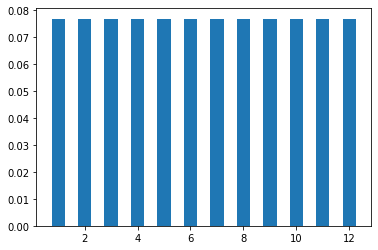

In [24]:
result_set = list(range(1,13))
roll_probabilities = [1/13 for result in result_set]

fig, ax = plt.subplots()
ax.bar(result_set, roll_probabilities, width=.5)

The pmf of a discrete uniform distribution is simply:

$ f(x)=\frac{1}{n} $


## PDF: Probability Density Function
> Probability density functions are similar to PMFs, in that they describe the probability of a result within a range of values.  But where PMFs can be descibed with barplots, PDFs are smooth curves.  

![](images/pdf_temp.png)



We can think of a pdf as a bunch of bars of probabilities getting smaller and smaller until each neighbor is indistinguishable from its neighbor.


![](images/pdf_inter.png)

# Describing the PDF

Instead of calculating the mean and standard deviation by hand (this would require integration), we will rather get familiar with how they affect the shape of our PDF.


The mean of our PDF affects where it is centered on the x-axis.  In numpy and stats, mean is denoted by the loc parameter.

The two plots below have the same shape, but different centers.

The variance of our plots describes how closely the points are gathered around the mean.  Low variance means tight and skinny, high variance short and wide.

## Skew 

We will touch briefly on the third and fourth moments for the normal curve. Skew is a measure of assymemtry.  A skew of zero is perfectly symetrical about the mean.   
![skew](images/skew.png)

To add right skew to the data, let's add some outliers to the left of the mean.

To learn about skew, let's take a normal distribution, and add values to skew it.

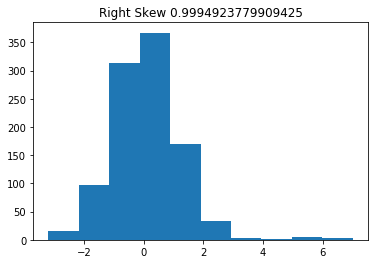

In [38]:
z_curve = np.random.normal(0,1, 1000)
add_right_skew = np.random.choice(np.random.normal(5,1,1000) , 10)
right_skewed_data = np.concatenate([z_curve, add_right_skew])

fig, ax = plt.subplots()
ax.hist(right_skewed_data)
ax.set_title(f"Right Skew {stats.skew(right_skewed_data)}");

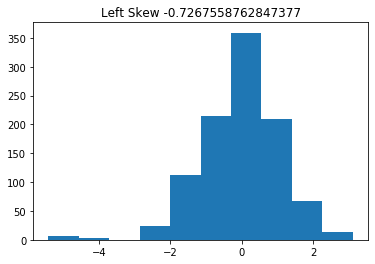

In [40]:
z_curve = np.random.normal(0,1, 1000)
add_left_skew = np.random.choice(np.random.normal(-5,1,1000) , 10)
left_skewed_data = np.concatenate([z_curve, add_left_skew])

fig, ax = plt.subplots()
ax.hist(left_skewed_data)
ax.set_title(f"Left Skew {stats.skew(left_skewed_data)}");

# Pair Program

When we get to modeling, certain models may be improved by correcting the skew of our distributions to make them more normal.  below are a few different ways to correct for different types of skew.

### Transforming  Right/Positively Skewed Data

We may want to transform our skewed data to make it approach symmetry.

Common transformations of this data include 

#### Square root transformation:
Applied to positive values only. Hence, observe the values of column before applying.


#### The cube root transformation: 
involves converting x to x^(1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data.

#### The logarithm:
x to log base 10 of x, or x to log base e of x (ln x), or x to log base 2 of x, is a strong transformation and can be used to reduce right skewness.

## Left/Negatively Skewed Data

### Square transformation:
The square, x to x2, has a moderate effect on distribution shape and it could be used to reduce left skewness.
Another method of handling skewness is finding outliers and possibly removing them

Let's return to the Divy ride times.

Let's return to our Divy ride time example.  

Below is the original distribution of ride times.


With a partner, apply an appropriate transformation to reduce the skew of the distribution:
    
  - 1. Select and apply an appropriate transformation
  - 1. Plot transformed distribution
  - 3. Report transformed skew
    - Hint: certain transformations don't like zeros
    

Text(0.5, 1.0, 'Log Transformed Ride Times: -1.35')

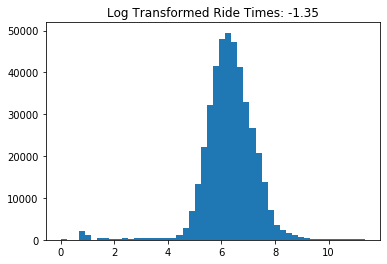

In [44]:
fig, ax = plt.subplots()
log_ride = np.log(divy_trips[divy_trips.ride_time>0]['ride_time'])
ax.hist(log_ride, bins=50);
ax.set_title("Log Transformed Ride Times: {}".format(round(stats.skew(log_ride),2)))

# Kurtosis

![kurtosis](images/kurtosis.png)


## CDF: Cumulative Distribution Function

![](images/cdf.png)

The cumulative distribution function describes the probability that your result will be of a value equal to or below a certain value. It can apply to both discrete or continuous functions.

For the scenario above, the CDF would describe the probability of drawing a ball equal to or below a certain number.  

In order to create the CDF from a sample, we:
- align the values from least to greatest
- for each value, count the number of values that are less than or equal to the current value
- divide that count by the total number of values

The CDF of the Lotto example plots how likely we are to get a ball less than or equal to a given example. 

Let's create the CDF for our Lotto example


In [46]:
# align the values
lotto_dict = {0:0, 1:50, 2:25, 3:15, 4:10}
values = list(lotto_dict.keys())
# count the number of values that are less than or equal to the current value
count_less_than_equal = np.cumsum(list(lotto_dict.values()))
# divide by total number of values
prob_less_than_or_equal = count_less_than_equal/sum(lotto_dict.values()) 

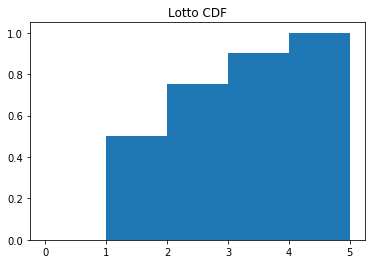

In [47]:
fix, ax = plt.subplots()
ax.bar(values, prob_less_than_or_equal, width=1)

ax.set_title('Lotto CDF')

x_tick_values = list(range(0,6))
x_tick_pos = [tick-.5 for tick in x_tick_values]

ax.set_xticks(x_tick_pos)
ax.set_xticklabels(x_tick_values);

# Pair Program
Taking what we know about cumulative distribution functions, create a plot of the CDF of divy bike rides by hour of the day.

Take this in steps (no pun intended).
1. Count the number of rides per hour.  Hint: Use groupby.
2. Make sure the hours are arranged from earliest to latest.
3. Calculate the cumulative sum after each hour (hint: try np.cumsum())
4. Use a list comprehension or for loop to divide each hours cumsum by the total.
5. Create a bar plot in matplotlib.
6. Fix the x-ticks to be positioned at the beginning of each bar


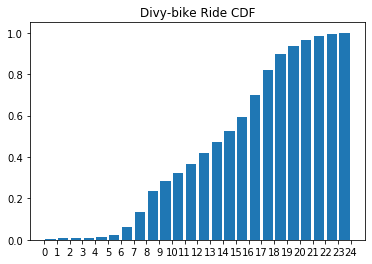

In [48]:

rides_per_hr = divy_trips.groupby('hour').count()['ride_id']

rides_per_hr_cs = rides_per_hr.cumsum()

rides_per_hr_cdf = [hour_count/rides_per_hr_cs[23] for hour_count in rides_per_hr_cs]

fig, ax = plt.subplots()
ax.bar(rides_per_hr_cs.index, rides_per_hr_cdf, width=.8)

x_tick_values = list(range(0,25))
x_tick_pos = [tick-.5 for tick in x_tick_values]

ax.set_xticks(x_tick_pos)
ax.set_xticklabels(x_tick_values)
ax.set_title('Divy-bike Ride CDF');

(array([0.00404791, 0.00654506, 0.00807239, 0.00919447, 0.01173847,
        0.02415628, 0.05968793, 0.13569633, 0.23594066, 0.28480136,
        0.32155816, 0.36652323, 0.41913668, 0.47341568, 0.52679515,
        0.59331392, 0.69816134, 0.82208406, 0.89483634, 0.93784538,
        0.96320103, 0.98196712, 0.99338232, 1.        ]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

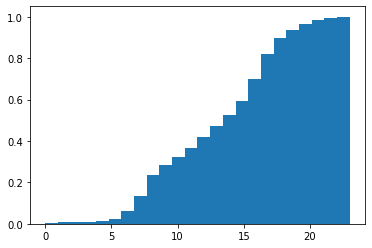

In [49]:
# Simple solution
fig, ax = plt.subplots()
ax.hist(divy_trips['hour'], cumulative=True, bins=24, density=True)

- For continuous random variables, obtaining probabilities for observing a specific outcome is not possible 
- Have to be careful with interpretation in PDF

We can, however, use the CDF to learn the probability that a variable will be less than or equal to a given value.



Consider the following normal distributions of heights (more on the normal distribution below).

The PDF and the CDF look like so:


If we provide numpy with the underlying parameters of our distribution, we can calculate: 


We can also calculate the value associated with a specfic percentile:

And from there, the value of ranges, such as the interquartile range:

![break](https://media.giphy.com/media/mX3Pf78rXsfxrUDNwi/giphy.gif)

# 3. Bernouli and Binomial Distributions

The Bernouli distribution is the discrete distribution that describes a two-outcome trial, such as heads or tails.  The distribution is described by the probability of one random variable of the value 1 associated with the probability p, and its correlary, the probability q, associated with 0  and taking the probability 1-p. 

PMF: 
${\displaystyle {\begin{cases}q=1-p&{\text{if }}k=0\\p&{\text{if }}k=1\end{cases}}}$

The simplest example is, once again, a coin flip.  In this scenario, we define either heads or tails as a "success", and assume, if the coin is fair, the probability of success to be .5

![](images/bernouli.png)

Another example would be the chance a nohitter would occur in a baseball game.

![no_hitter](https://media.giphy.com/media/nTbCRLw5ZPWBa/giphy.gif)

We will scrape data from the web for this example:

To create a Bernouli distribution from the above data, we have to calculate the probability of a no-hitter occuring in a single trial.  In this scenario, a trial is a single game.`

In [116]:

# Calculate the number of total games that have occured, assuming 2430 games per season
seasons = list(range(1998, 2020))
seasons = len(seasons)

total_games = seasons*2340
total_games


51480

In [124]:
# Count the number of no hitters
no_hitter_count = no_hit_table_1998.shape[0]
no_hitter_count

59

In [125]:
# divide number of no hitters by the number of total games

p_no_hitter = no_hitter_count/total_games

p_no_hitter

0.0011460761460761462

The expected value is the probability of success, i.e. **.001146**  
The variance is:  
$\sigma^2 = (p\_no\_hitter)*(1-p\_no\_hitter) = .001147 $

## Binomial

The Binomial distribution describes the number of successess of a set of bernouli trials. For example, say we have an unfair coin with a probability of landing heads of .8, if we designated our number of trials as 3, our PMF and CDF would look like what we see below:
![](images/binomial.png)

For the binomial our Expected Value and Variance can be calculated like so:
- Expected Value
> $E(X) = np$ <br>
- Variance
> $Var(X) = np(1-p)$<br>

If we want to see the probability of a certain number of successes, we use the pmf.
$\Large f(x) = {n \choose k}p^k(1 - p)^{n - k}$

Note: ${n\choose k} = \frac{n!}{k!(n - k)!}$, the number of ways of choosing $k$ objects from a total of $n$.

## Coin Flip Code Along
To get our feet wet with the multinomial, let's look at the traditional coin flip example.

![coin_flip](https://media.giphy.com/media/Q8gsDmBzmNkKE9DVsg/giphy.gif)

Let's code out the probability mass distribution of observing a certain number of heads in sets of 10 flips of a fair coin.



While it may be evident what the set of possible outcomes is, often that is not the case.  We can use stats.binom.ppf() to create a the set of outcomes. 

**stats.binom.ppf** returns the outcome associated with a given percentage of the cdf. We can then use np.arange to create the set of outcomes associated with a range of percentages.  In this case, we can reproduce the range of using a very low and high percentage.


In [208]:
#  What is the probability of a succesful trial (p)?
p_heads = .5

In [209]:
#  How many trials constitute one round of our experiment (k)? 
n = 10

In [218]:
# What is our set of possible outcomes?

k_set = list(range(0,11))

# or


start = stats.binom(n, p_heads).ppf(.0001)
stop = stats.binom(n, p_heads).ppf(1)

k_set = np.arange(start, stop+1)
k_set

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [219]:
# What probability is associated with each outcome?

probs_k = stats.binom.pmf(k_set, n, p_heads)

<BarContainer object of 11 artists>

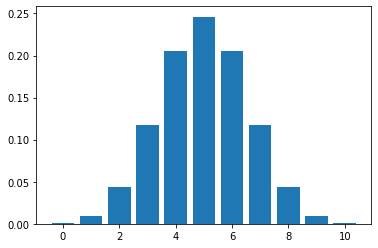

In [220]:
# Plot the pmf
fig, ax = plt.subplots()
ax.bar(k_set, probs_k)

# Pair Programming (12 minutes)

We will expand on our no hitter example from above, modeling the probability of the number of no-hitters occuring over an entire season's worth of games.  

In pairs, you will create the PMF and CDF of the multinomial distribution of our no-hitter example.  

To get started, 

     1. calculate the expected value and the variance of the distribution.
       - to do so, you must define n (number of trials) and p (the probability of a no-hitter in one trial).  
       
     2. Create a range of results (i.e. an ordinal set of counts of nohitters per season) using np.arange and stats.binomial.ppf()
     
     3. Create probabilities associated with each result using stats.binom.ppf
     
     4. Create a bar plot of the probabilities associated with each no-hitter count
     




In [222]:
# 1. calculate the expected value and the variance of the distribution.

n = 2340
p = p_no_hitter

expected_value = n*p
variance = n*p*(1-p)

print("We expect {} no hitters across a season".format(round(expected_value,5)))
print("The variance of the nohitter distribution is {}".format(round(variance, 5)))

We expect 2.68182 no hitters across a season
The variance of the nohitter distribution is 2.67874


In [224]:
# 2. Create a range of results using np.arrange and stats.binomial.ppf()
x = np.arange(stats.binom(n,p).ppf(.00001), stats.binom.ppf(.9999,n,p))
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [226]:
# 3. Create probabilities associated with each result using stats.binom.ppf

p_binom = stats.binom.pmf(x, 2340, p)
p_binom

array([0.06833343, 0.18346811, 0.24619108, 0.2201441 , 0.14757652,
       0.07911004, 0.03532472, 0.01351428, 0.00452199, 0.00134439,
       0.00035957])

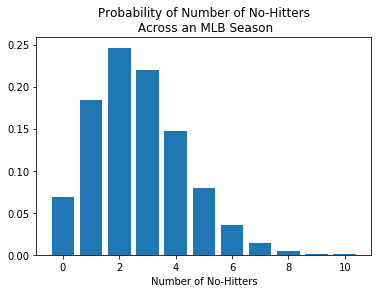

In [228]:
# 4. Create a bar plot of the probabilities associated with each no-hitter count
fig, ax = plt.subplots()
ax.bar(x, p_binom)
ax.set_title('Probability of Number of No-Hitters\n Across an MLB Season')
ax.set_xlabel('Number of No-Hitters');

# 4. Normal Distribution

The normal distribution describes many phenomena. Think of anything that has a typical range:
- human body temperatures
- sizes of elephants
- sizes of stars
- populations of cities
- IQ
- Heart rate

Among human beings, 98.6 degrees Fahrenheit is an _average_ body temperature. Many folks' temperatures won't measure _exactly_ 98.6 degrees, but most measurements will be _close_. It is much more common to have a body temperature close to 98.6 (whether slightly more or slightly less) than it is to have a body temperature far from 98.6 (whether significantly more or significantly less). This is a hallmark of a normally distributed variable.

Similarly, there are large elephants and there are small elephants, but most elephants are near the average size.

The normal distribution is _very_ common in nature and will arise often in your work. Get to know it well!

You will recognize it by its characteristic bell curve. 

![normal_curve](images/IQ_normal.png)

You may see the notation 

$ N(μ,σ2)$

where N signifies that the distribution is normal, μ is the mean, and σ2 is the variance. 


The PDF of the normal curve equals:

$\Large f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left[\frac{-(x - \mu)^2}{2\sigma^2}\right]$


![](images/normal_2.png)

# Quick Solo Challenge

Turn off you cameras, turn them back on when you solved the problem, or when 1 minutes is up.

suppose the average height of an American woman is 65 inches with a standard deviation of 3.5 inches. 
Use numpy's random.normal to generate a sample of 1000 women and plot the histogram of the sample.


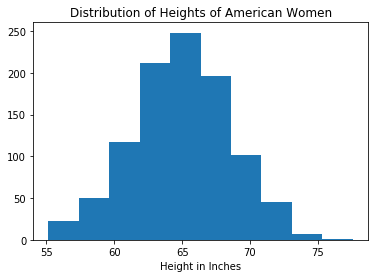

In [231]:

fig, ax = plt.subplots()
ax.hist(np.random.normal(65, 3.5, 1000))
ax.set_title('Distribution of Heights of American Women')
ax.set_xlabel('Height in Inches');

# Standard Normal Distribution

A standard normal distribution has a mean of 0 and variance of 1. This is also known as a z distribution. 


![norm_to_z](images/norm_to_z.png)

![](images/empirical_rule.png)

## Empirical Rule
> The empirical or 68–95–99.7 states that 68% of the values of a normal distribution of data lie within 1 standard deviation of the mean, 95% within 2 stds, and 99.7 within three.  
> The empirical rule has countless applications in data science, which we will expand upon in the next few lectures.

By calculating the z-score of an individual point, we can see how unlikely a value is.

Consider, once again, the distribution of heights of American women, with a mean of 65 inches and a standard deviatio of 3.5 inches.

Calculate the zscore of a height of 75inches. 

Based on the empirical rule, if you were sampling heights of American women, speculate as to how improbable would that height be?

In [234]:
mu = 65
std = 3.5
z = (75-65)/3.5
z

# very improbable.  The height is close to 3 standard deviations away from the mean, which means it is greater than 99% of the population.

2.857142857142857

# Pair Program

Z score can be used to eliminate outliers.

Based on the empirical rule, if our data is normally distributed, we can remove outliers based on the zscore. 

In the example below, we will consider anything outside of 3 std's away from the mean an outlier.

Z score outlier removal wouldn't work on our original divy bike ride time dataset, because the original set was heavily right skewed.  However, our log transformed data set was approximately normal.  Let's remove outliers based on the log transformed data.

In order to do so, you need to:

    1. remove records with zero values for ride_time
    2. log transform the ride_times
    3. use stats.zscore to calculate the z-score for each logtransformed time
    4. Use np.absolute to subset the dataframe to include values above or below 3 standard deviations from the mean 
    5. Plot the boxplot of the ride times with time in seconds (i.e. do not plot the log-transformed distribution.  The boxplot, therefore, will still show outliers)

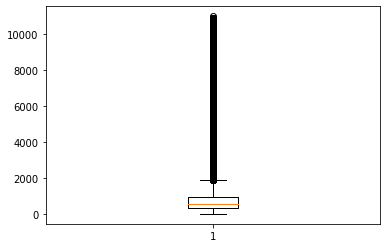

In [122]:
# 1
divy_trips_no_zero = divy_trips[divy_trips.ride_time > 0]
# 2,3,4
no_fliers_trips = divy_trips_no_zero[np.absolute(stats.zscore((np.log(divy_trips_no_zero.ride_time[divy_trips_no_zero.ride_time > 0]))) < 3)]

# 5
fig, ax = plt.subplots()
ax.boxplot(no_fliers_trips.ride_time);